# SVM

Jaccard similarity score: 0.9554455445544554
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        70
           1       0.96      1.00      0.98       193

    accuracy                           0.97       263
   macro avg       0.98      0.94      0.95       263
weighted avg       0.97      0.97      0.96       263

AUC: 1.00
Jaccard similarity score: 0.9234449760765551
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        70
           1       0.92      1.00      0.96       193

    accuracy                           0.94       263
   macro avg       0.96      0.89      0.92       263
weighted avg       0.94      0.94      0.94       263

AUC: 1.00
Jaccard similarity score: 0.9320388349514563
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        71
          

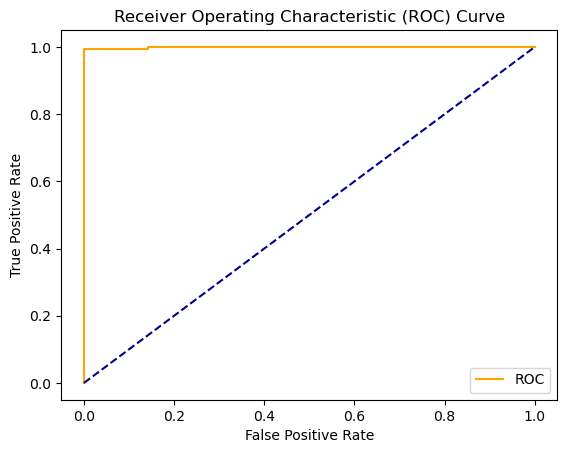

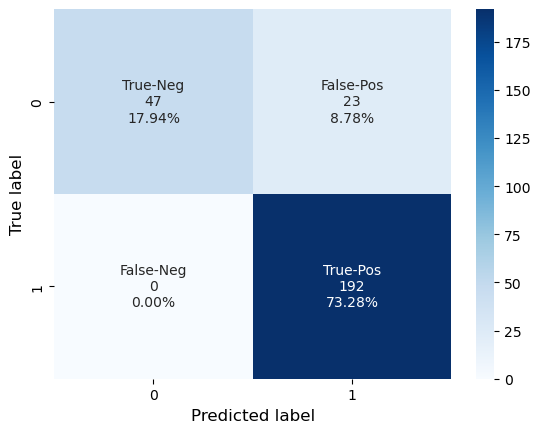

In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import jaccard_score, roc_curve, roc_auc_score, classification_report, confusion_matrix

# Load the dataset
dataset = pd.read_csv(r"C:\Users\Ramachandra\OneDrive\Desktop\Shalini ma'am\TADPOLE_D1_D2.csv")

# Remove rows with missing values
dataset.dropna(inplace=True)

# Define features and target variable
X = dataset[['CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate']]
y = dataset['DX_bl']

# Standardize features
X = StandardScaler().fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Define a function to plot ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Initialize StratifiedKFold for k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True)

# Array to store Jaccard scores for each fold
jaccard_scores = []

for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Initialize SVM classifier without random_state
    clf = SVC(kernel='rbf', probability=True, C=0.005)
    clf.fit(X_train_fold, y_train_fold)
    y_pred = clf.predict(X_test_fold)

    jaccard = jaccard_score(y_test_fold, y_pred)
    jaccard_scores.append(jaccard)

    print("Jaccard similarity score:", jaccard)
    cf_matrix = confusion_matrix(y_test_fold, y_pred)
    print("Classification Report:\n", classification_report(y_test_fold, y_pred))

    # Compute AUC Score
    probs = clf.predict_proba(X_test_fold)[:, 1]
    auc = roc_auc_score(y_test_fold, probs)
    print('AUC: %.2f' % auc)

# Calculate and print the average Jaccard score
average_jaccard = np.mean(jaccard_scores)
print("Average Jaccard Score:", average_jaccard)

# Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_fold, probs)

# Plot ROC Curve
plot_roc_curve(fpr, tpr)

# Create labels for confusion matrix
group_names = ["True-Neg", "False-Pos", "False-Neg", "True-Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plot Heat Map for Confusion Matrix
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()


# KNN

C:\Users\Ramachandra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.945
Confusion Matrix:
 [[97  7]
 [ 4 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       104
           1       0.93      0.96      0.94        96

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



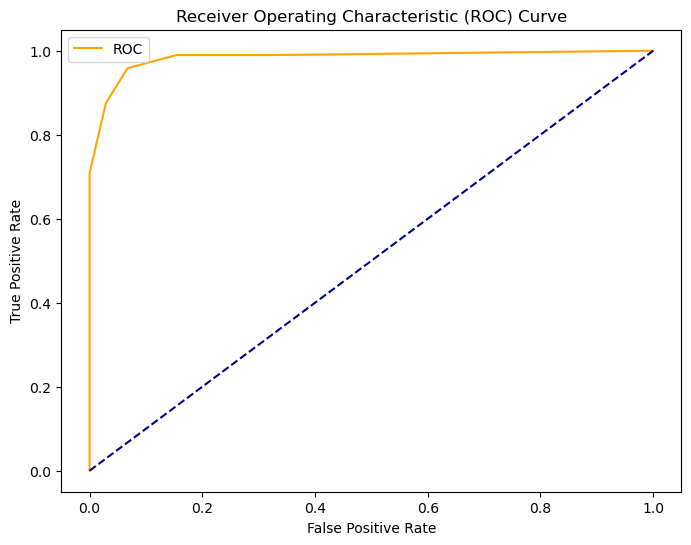

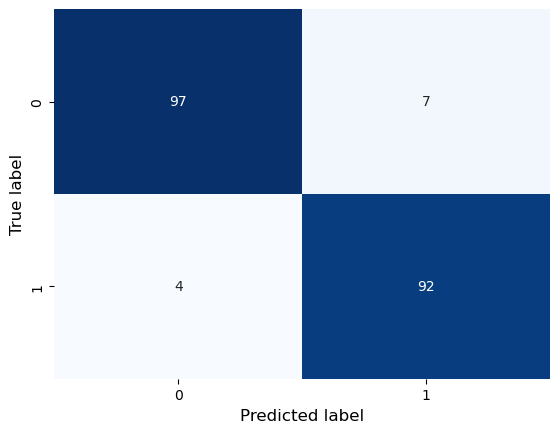

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a toy dataset (you can replace this with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN model
k = 5
clf_knn = KNeighborsClassifier(n_neighbors=k)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

# Accuracy without noise
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

# Confusion matrix and classification report
cf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# ROC curve and AUC score
probs = clf_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Heat Map
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()


# NB

Jaccard similarity score:  0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        79
           1       0.87      0.80      0.83        81

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160

AUC: 0.94
Jaccard similarity score:  0.7613636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        79
           1       0.91      0.83      0.86        81

    accuracy                           0.87       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.87      0.87      0.87       160

AUC: 0.93
Jaccard similarity score:  0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87        79
       

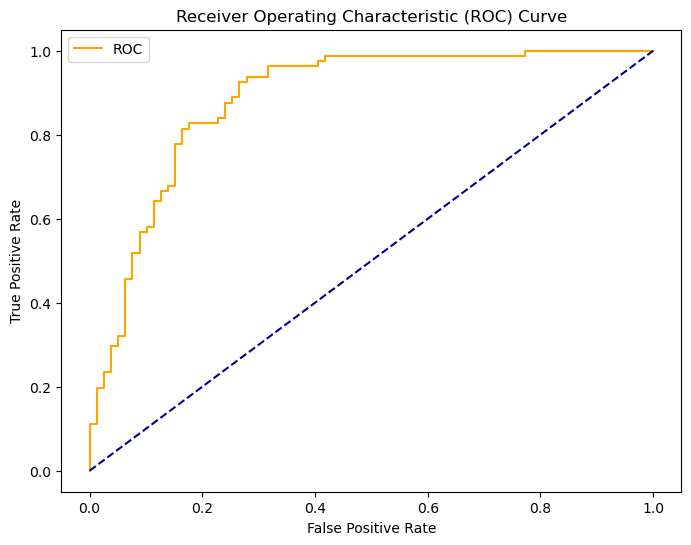

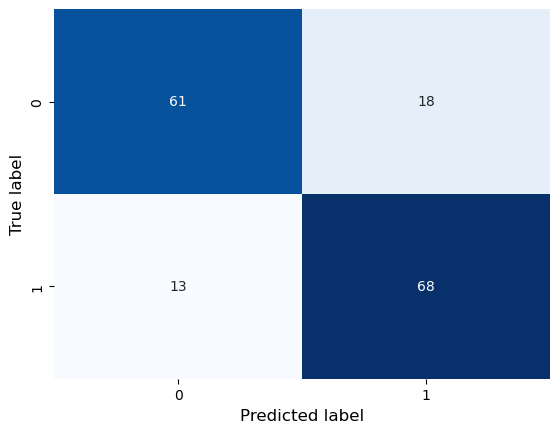

In [3]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import jaccard_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Assuming X_train and y_train are defined earlier in the code

# Using StratifiedKFold for k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Array to store Jaccard scores for each fold
jaccard_scores = []
auc_scores = []

for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    clf = GaussianNB()
    clf.fit(X_train_fold, y_train_fold)
    y_pred = clf.predict(X_test_fold)

    jaccard = jaccard_score(y_test_fold, y_pred)
    jaccard_scores.append(jaccard)

    print("Jaccard similarity score: ", jaccard)
    cf_matrix = confusion_matrix(y_test_fold, y_pred)
    print("Classification Report:\n", classification_report(y_test_fold, y_pred))

    # Train the model using the training sets
    probs = clf.predict_proba(X_test_fold)

    # Predict probabilities for the test data
    probs = probs[:, 1]

    # Compute the AUC Score
    auc = roc_auc_score(y_test_fold, probs)
    auc_scores.append(auc)
    print('AUC: %.2f' % auc)

# Calculate and print the average Jaccard score and AUC score
average_jaccard = np.mean(jaccard_scores)
average_auc = np.mean(auc_scores)
print("Average Jaccard Score:", average_jaccard)
print("Average AUC Score:", average_auc)

# Get the ROC Curve for the last fold (you can modify this based on your needs)
fpr, tpr, thresholds = roc_curve(y_test_fold, probs)

# Plot ROC Curve using our defined function
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Heat Map for the last fold's Confusion Matrix (you can modify this based on your needs)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()
